In [2]:
# importing  Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# using Glob package for  extracting required files
import glob

In [7]:
glob.glob(r'/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/*csv')

['/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/XRX_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/GS_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/SPGI_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/MTB_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/V_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/CTAS_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/ESRX_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/APH_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/BBT_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/RHI_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/GGP_data.csv',

In [8]:
# let us see how many files are there in total
len(glob.glob(r'/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/*csv'))

509

In [15]:
# let us take any 4 companies csv file 
company_list=[r'/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/MSFT_data.csv',
             '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/AAPL_data.csv',
             '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/AMZN_data.csv',
             '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/JPM_data.csv',]

In [19]:
# To grt rid of warning 
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [30]:
all_df=pd.DataFrame()
for i in company_list:
    c_df=pd.read_csv(i)
    all_df=pd.concat([all_df,c_df],ignore_index=True)

In [32]:
all_df.shape

(5036, 7)

In [33]:
all_df.head(10)

date     open   high     low   close    volume  Name
0  2013-02-08  27.3500  27.71  27.310  27.550  33318306  MSFT
1  2013-02-11  27.6500  27.92  27.500  27.860  32247549  MSFT
2  2013-02-12  27.8800  28.00  27.750  27.880  35990829  MSFT
3  2013-02-13  27.9300  28.11  27.880  28.030  41715530  MSFT
4  2013-02-14  27.9200  28.06  27.870  28.040  32663174  MSFT
5  2013-02-15  28.0400  28.16  27.875  28.010  49650538  MSFT
6  2013-02-19  27.8801  28.09  27.800  28.045  38804616  MSFT
7  2013-02-20  28.1300  28.20  27.830  27.870  44109412  MSFT
8  2013-02-21  27.7400  27.74  27.230  27.490  49078338  MSFT
9  2013-02-22  27.6800  27.76  27.480  27.760  31425726  MSFT

In [34]:
# finding out unique company names from name column 
all_df['Name'].unique()

array(['MSFT', 'AAPL', 'AMZN', 'JPM'], dtype=object)

In [43]:
# creating a list of unique company names 
name_list=all_df['Name'].unique()
name_list

array(['MSFT', 'AAPL', 'AMZN', 'JPM'], dtype=object)

In [ ]:
# what was the change in price of stock overtime

In [35]:
all_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [ ]:
# there are no null values

In [38]:
# check the datatype of each columns 
all_df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [39]:
# let us convert date column to datetime datatype
all_df['date']=pd.to_datetime(all_df['date'])

In [41]:
all_df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

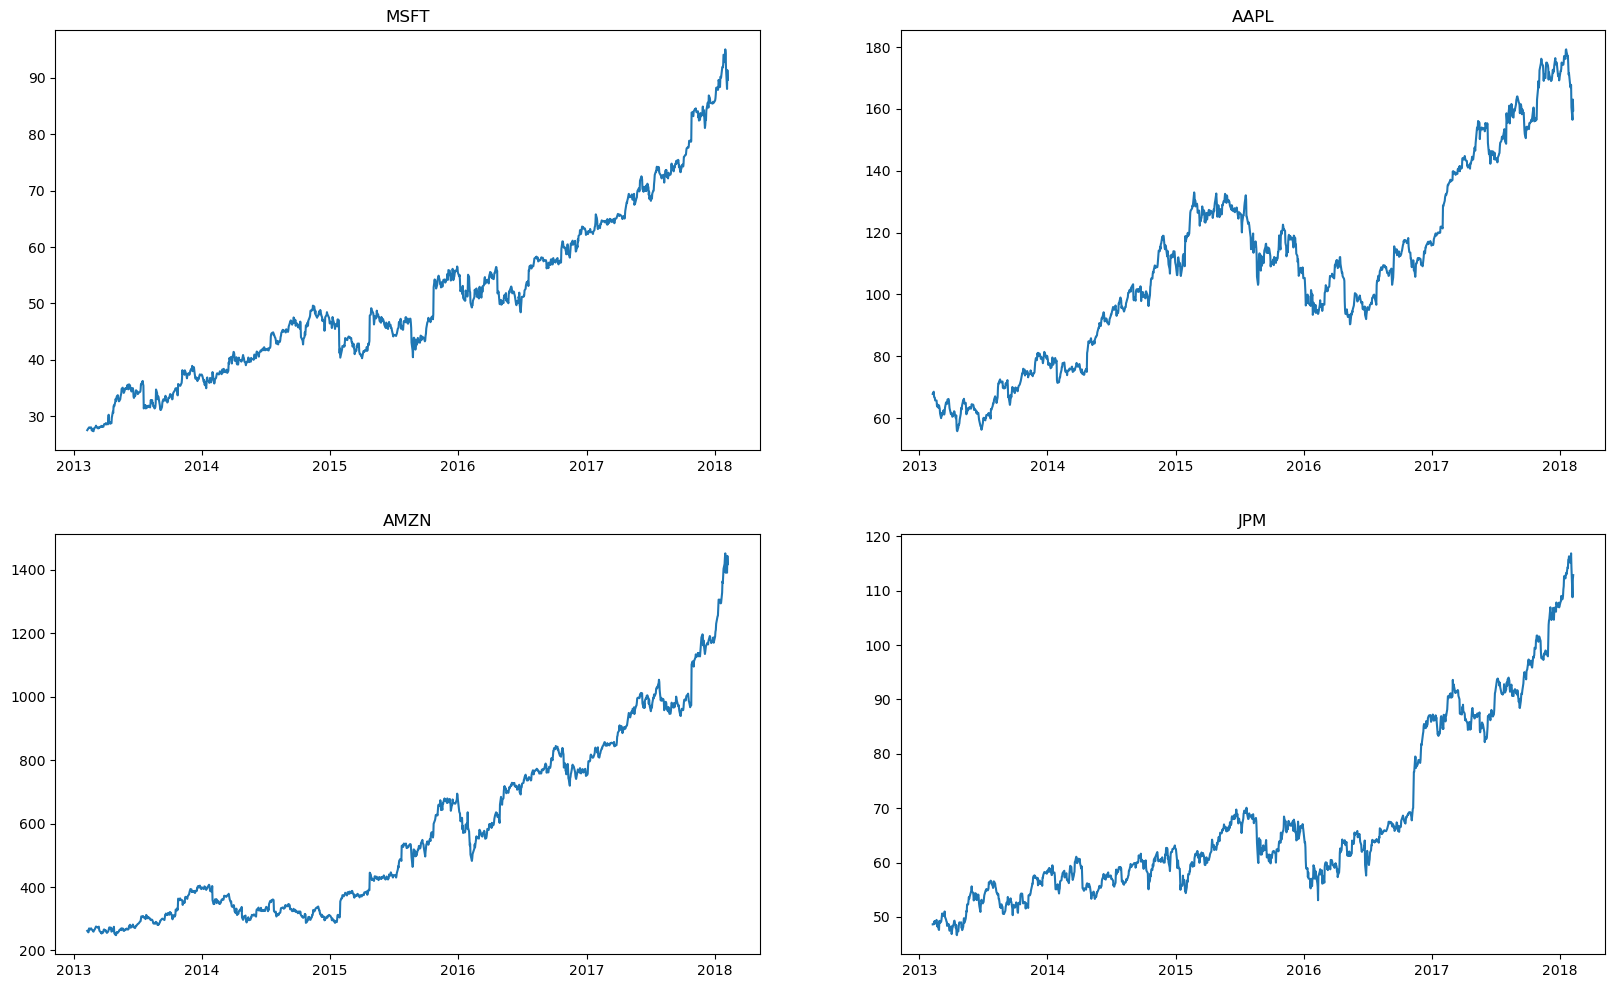

In [46]:
# plotting graph for all companies to analyze trends
plt.figure(figsize=(20,12))
for i,j in enumerate(name_list,1):
    plt.subplot(2,2,i)
    filter1=all_df['Name']==j
    x_df=all_df[filter1]
    plt.plot(x_df['date'],x_df['close'])
    plt.title(j)
    

In [ ]:
# what was the moving average of various stocks

In [47]:
# let us check moving average with window 10
all_df['close'].rolling(window=10).mean().head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
15    27.7615
16    27.7920
17    27.8140
18    27.8790
19    27.9030
Name: close, dtype: float64

In [48]:
# creating a new dataframe instead of new data so that the original dataframe won't get affected
new_df=all_df.copy()

In [49]:
# checking the moving average with window values 10,20,50
day=[10,20,50]

for m_avg in day:
    new_df['close'+str(m_avg)]=new_df['close'].rolling(m_avg).mean()
    

In [58]:
new_df.tail(5)

date    open     high      low   close    volume Name  close10  \
5031 2018-02-01  115.77  116.985  115.480  116.87  13800613  JPM  115.309   
5032 2018-02-02  116.49  116.920  114.090  114.28  16477307  JPM  115.436   
5033 2018-02-05  113.00  114.590  103.980  108.80  30097591  JPM  114.883   
5034 2018-02-06  106.85  112.480  106.610  112.11  33114833  JPM  114.673   
5035 2018-02-07  111.55  114.450  111.146  112.87  21878324  JPM  114.393   

       close20   close50  
5031  113.0150  108.0866  
5032  113.2770  108.3920  
5033  113.3000  108.5894  
5034  113.4805  108.8588  
5035  113.6715  109.1498

In [59]:
# setting date as index 
new_df.set_index('date',inplace=True)

In [60]:
new_df

open     high      low   close    volume  Name  close10  \
date                                                                    
2013-02-08   27.35   27.710   27.310   27.55  33318306  MSFT      NaN   
2013-02-11   27.65   27.920   27.500   27.86  32247549  MSFT      NaN   
2013-02-12   27.88   28.000   27.750   27.88  35990829  MSFT      NaN   
2013-02-13   27.93   28.110   27.880   28.03  41715530  MSFT      NaN   
2013-02-14   27.92   28.060   27.870   28.04  32663174  MSFT      NaN   
...            ...      ...      ...     ...       ...   ...      ...   
2018-02-01  115.77  116.985  115.480  116.87  13800613   JPM  115.309   
2018-02-02  116.49  116.920  114.090  114.28  16477307   JPM  115.436   
2018-02-05  113.00  114.590  103.980  108.80  30097591   JPM  114.883   
2018-02-06  106.85  112.480  106.610  112.11  33114833   JPM  114.673   
2018-02-07  111.55  114.450  111.146  112.87  21878324   JPM  114.393   

             close20   close50  
date                            
2013-02-08       NaN       NaN  
2013-02-11       NaN       NaN  
2013-02-12       NaN       NaN  
2013-02-13       NaN       NaN  
2013-02-14       NaN       NaN  
...              ...       ...  
2018-02-01  113.0150  108.0866  
2018-02-02  113.2770  108.3920  
2018-02-05  113.3000  108.5894  
2018-02-06  113.4805  108.8588  
2018-02-07  113.6715  109.1498  

[5036 rows x 9 columns]

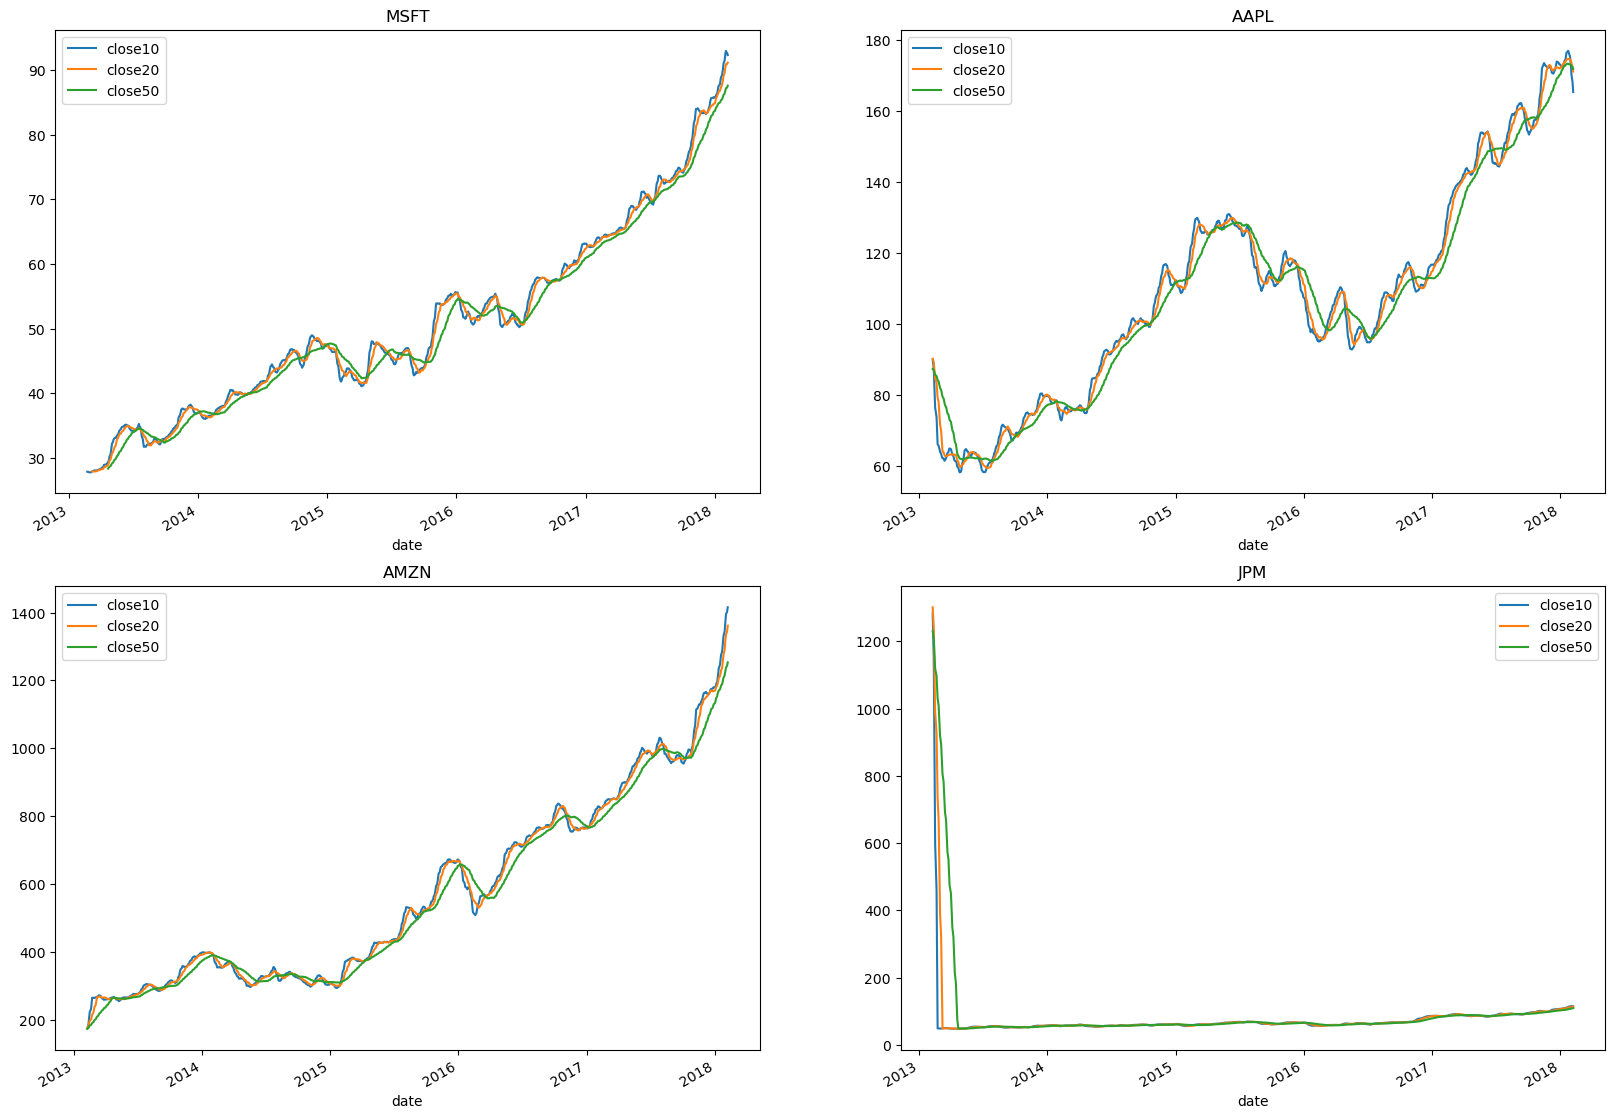

In [63]:
# plotting graphs fro all companies 
plt.figure(figsize=(20,15))
for i,j in enumerate(name_list,1):
    plt.subplot(2,2,i)
    filter1=new_df['Name']==j
    x_df=new_df[filter1]
    x_df[['close10','close20','close50']].plot(ax=plt.gca())
    plt.title(j)
    

In [ ]:
# analyzing cosing price range JPM stock

In [65]:
company_list

['/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/MSFT_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/AAPL_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/AMZN_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/JPM_data.csv']

In [66]:
jpm_df=pd.read_csv(r'/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/JPM_data.csv')

In [68]:
jpm_df.head(10)

date   open     high    low  close    volume Name
0  2013-02-08  48.33  48.6900  48.26  48.63  15217458  JPM
1  2013-02-11  48.51  48.9000  48.38  48.66  13934328  JPM
2  2013-02-12  48.80  49.3100  48.60  49.14  16387566  JPM
3  2013-02-13  49.35  49.4500  48.50  48.68  21635732  JPM
4  2013-02-14  48.40  49.2899  48.37  49.22  18017634  JPM
5  2013-02-15  49.35  49.4600  48.57  48.88  20015681  JPM
6  2013-02-19  49.12  49.6800  49.12  49.45  20445200  JPM
7  2013-02-20  49.35  49.5400  48.36  48.61  24787660  JPM
8  2013-02-21  48.41  48.4500  47.83  48.25  24436578  JPM
9  2013-02-22  48.63  48.9100  48.41  48.91  23583917  JPM

In [69]:
# adding a extra column that specifies change of closing price 
jpm_df['daily_return(in %)']=jpm_df['close'].pct_change()*100

In [70]:
jpm_df.head(4)

date   open   high    low  close    volume Name  daily_return(in %)
0  2013-02-08  48.33  48.69  48.26  48.63  15217458  JPM                 NaN
1  2013-02-11  48.51  48.90  48.38  48.66  13934328  JPM            0.061690
2  2013-02-12  48.80  49.31  48.60  49.14  16387566  JPM            0.986436
3  2013-02-13  49.35  49.45  48.50  48.68  21635732  JPM           -0.936101

In [71]:
# importing plotly library 
import plotly.express as px

In [72]:
px.line(jpm_df,x='date',y='daily_return(in %)')

In [ ]:
# performing resampling analysis of closing price

In [73]:
jpm_df.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_return(in %)    float64
dtype: object

In [76]:
# setting date as index
jpm_df['date']=pd.to_datetime(jpm_df['date'])


In [78]:
jpm_df.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
daily_return(in %)           float64
dtype: object

In [79]:
jpm_df.head(10)

date   open     high    low  close    volume Name  daily_return(in %)
0 2013-02-08  48.33  48.6900  48.26  48.63  15217458  JPM                 NaN
1 2013-02-11  48.51  48.9000  48.38  48.66  13934328  JPM            0.061690
2 2013-02-12  48.80  49.3100  48.60  49.14  16387566  JPM            0.986436
3 2013-02-13  49.35  49.4500  48.50  48.68  21635732  JPM           -0.936101
4 2013-02-14  48.40  49.2899  48.37  49.22  18017634  JPM            1.109285
5 2013-02-15  49.35  49.4600  48.57  48.88  20015681  JPM           -0.690776
6 2013-02-19  49.12  49.6800  49.12  49.45  20445200  JPM            1.166121
7 2013-02-20  49.35  49.5400  48.36  48.61  24787660  JPM           -1.698686
8 2013-02-21  48.41  48.4500  47.83  48.25  24436578  JPM           -0.740588
9 2013-02-22  48.63  48.9100  48.41  48.91  23583917  JPM            1.367876

In [80]:
jpm_df.set_index('date',inplace=True)

In [81]:
jpm_df.head(10)

open     high    low  close    volume Name  daily_return(in %)
date                                                                       
2013-02-08  48.33  48.6900  48.26  48.63  15217458  JPM                 NaN
2013-02-11  48.51  48.9000  48.38  48.66  13934328  JPM            0.061690
2013-02-12  48.80  49.3100  48.60  49.14  16387566  JPM            0.986436
2013-02-13  49.35  49.4500  48.50  48.68  21635732  JPM           -0.936101
2013-02-14  48.40  49.2899  48.37  49.22  18017634  JPM            1.109285
2013-02-15  49.35  49.4600  48.57  48.88  20015681  JPM           -0.690776
2013-02-19  49.12  49.6800  49.12  49.45  20445200  JPM            1.166121
2013-02-20  49.35  49.5400  48.36  48.61  24787660  JPM           -1.698686
2013-02-21  48.41  48.4500  47.83  48.25  24436578  JPM           -0.740588
2013-02-22  48.63  48.9100  48.41  48.91  23583917  JPM            1.367876

In [82]:
jpm_df['close'].resample('M').mean()

date
2013-02-28     48.709286
2013-03-31     49.382500
2013-04-30     48.196364
2013-05-31     51.292273
2013-06-30     53.252500
                 ...    
2017-10-31     98.395000
2017-11-30     99.457143
2017-12-31    106.279000
2018-01-31    112.354286
2018-02-28    112.986000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

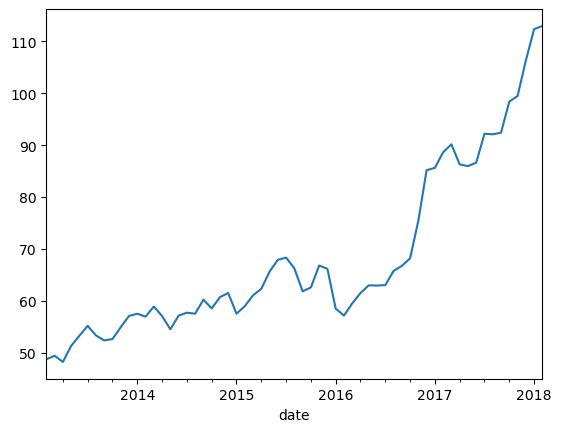

In [83]:
# lets plot above data for monthly 
jpm_df['close'].resample('M').mean().plot()

In [84]:
# lets see for yearly 
jpm_df['close'].resample('y').mean()

date
2013-12-31     52.489071
2014-12-31     58.172738
2015-12-31     63.829484
2016-12-31     65.622897
2017-12-31     92.009562
2018-12-31    112.475769
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

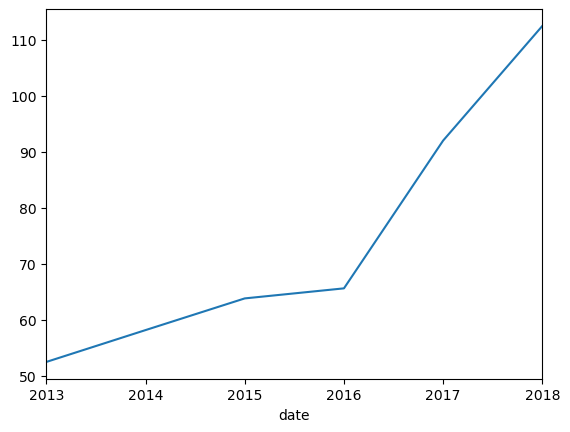

In [85]:
# plotting for yaerly based average
jpm_df['close'].resample('y').mean().plot()

In [86]:
# lets see for quarterly 
jpm_df['close'].resample('Q').mean()

date
2013-03-31     49.105294
2013-06-30     50.840625
2013-09-30     53.639375
2013-12-31     54.784844
2014-03-31     57.792295
2014-06-30     56.220476
2014-09-30     58.455156
2014-12-31     60.174687
2015-03-31     59.220984
2015-06-30     65.289524
2015-09-30     65.498594
2015-12-31     65.115625
2016-03-31     58.400164
2016-06-30     62.460625
2016-09-30     65.202812
2016-12-31     76.255556
2017-03-31     88.221452
2017-06-30     86.285079
2017-09-30     92.219683
2017-12-31    101.251905
2018-03-31    112.475769
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

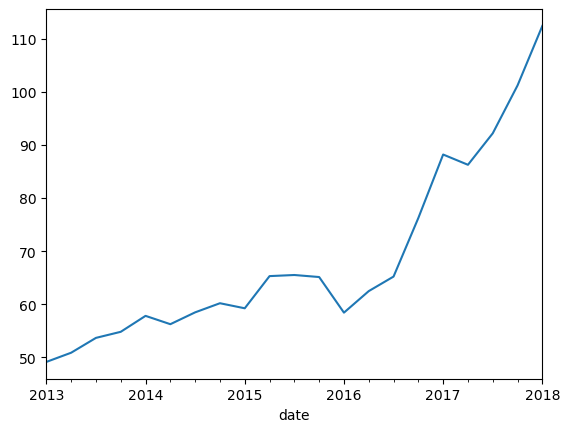

In [90]:
# plotting for quarterly based average
jpm_df['close'].resample('Q').mean().plot()

In [ ]:
# checking if the closing prices of 4 companies [apple,jp morgan,microsoft,amazon] are co related or not

In [91]:
# correlation analysis
company_list

['/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/MSFT_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/AAPL_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/AMZN_data.csv',
 '/Users/admin/Downloads/project material/s and p 500/individual_stocks_5yr/JPM_data.csv']

In [94]:
micro=pd.read_csv(company_list[0])
apple=pd.read_csv(company_list[1])
amzn=pd.read_csv(company_list[2])
jpm=pd.read_csv(company_list[3])

In [95]:
# creating a dataframe to store closing price of all companies
closing_price=pd.DataFrame()

In [96]:
closing_price['micro_close']=micro['close']

In [97]:
closing_price['apple_close']=apple['close']
closing_price['amzn_close']=amzn['close']
closing_price['jpm_close']=jpm['close']

In [99]:
closing_price.head()

micro_close  apple_close  amzn_close  jpm_close
0        27.55      67.8542      261.95      48.63
1        27.86      68.5614      257.21      48.66
2        27.88      66.8428      258.70      49.14
3        28.03      66.7156      269.47      48.68
4        28.04      66.6556      269.24      49.22

In [106]:
closing_price.corr()

micro_close  apple_close  amzn_close  jpm_close
micro_close     1.000000     0.899689    0.955977   0.946049
apple_close     0.899689     1.000000    0.819078   0.885486
amzn_close      0.955977     0.819078    1.000000   0.919671
jpm_close       0.946049     0.885486    0.919671   1.000000

<Axes: >

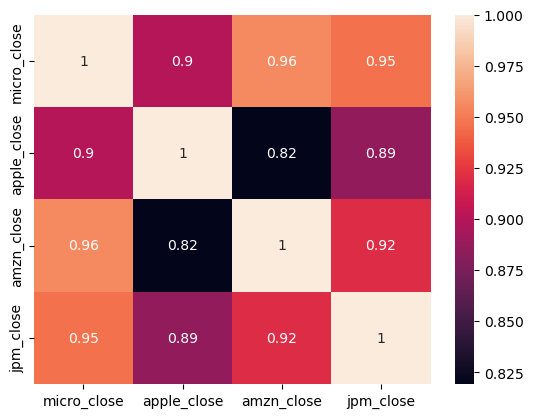

In [104]:
# plotting a heatmap 
sns.heatmap(closing_price.corr(),annot=True)

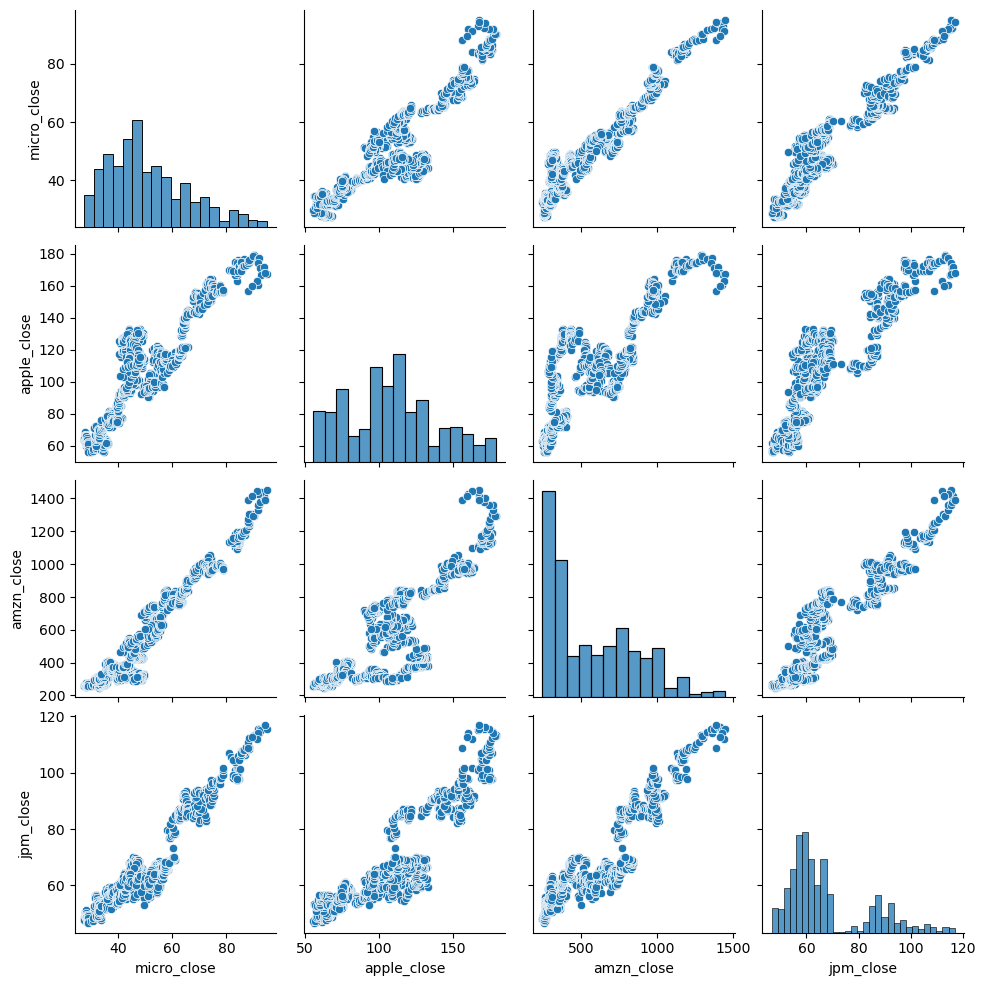

In [100]:
# visualising the closing price dataset with the help of Seborn
sns.pairplot(closing_price)

In [ ]:
# analysing closing price of stocks and daily returns of the stock are co related or not

In [107]:
# computing percentage change for each row
closing_price['micro_close']

0       27.55
1       27.86
2       27.88
3       28.03
4       28.04
        ...  
1254    94.26
1255    91.78
1256    88.00
1257    91.33
1258    89.61
Name: micro_close, Length: 1259, dtype: float64

In [108]:
# to compute percentage change we need this calculation 
# from above data ((27.86-27.55)/27.55)*100

In [109]:
(closing_price['micro_close']-closing_price['micro_close'].shift(1))/closing_price['micro_close'].shift(1)*100

0            NaN
1       1.125227
2       0.071788
3       0.538020
4       0.035676
          ...   
1254   -0.789391
1255   -2.631021
1256   -4.118544
1257    3.784091
1258   -1.883280
Name: micro_close, Length: 1259, dtype: float64

In [110]:
for col in closing_price:
    closing_price[col+'_pct_change']=(closing_price[col]-closing_price[col].shift(1))/closing_price[col].shift(1)*100
    

In [112]:
closing_price.head()

micro_close  apple_close  amzn_close  jpm_close  micro_close_pct_change  \
0        27.55      67.8542      261.95      48.63                     NaN   
1        27.86      68.5614      257.21      48.66                1.125227   
2        27.88      66.8428      258.70      49.14                0.071788   
3        28.03      66.7156      269.47      48.68                0.538020   
4        28.04      66.6556      269.24      49.22                0.035676   

   apple_close_pct_change  amzn_close_pct_change  jpm_close_pct_change  
0                     NaN                    NaN                   NaN  
1                1.042235              -1.809506              0.061690  
2               -2.506658               0.579293              0.986436  
3               -0.190297               4.163123             -0.936101  
4               -0.089934              -0.085353              1.109285

In [113]:
closing_price.columns

Index(['micro_close', 'apple_close', 'amzn_close', 'jpm_close',
       'micro_close_pct_change', 'apple_close_pct_change',
       'amzn_close_pct_change', 'jpm_close_pct_change'],
      dtype='object')

In [114]:
closing_df=closing_price[['micro_close_pct_change', 'apple_close_pct_change','amzn_close_pct_change', 'jpm_close_pct_change']]

In [115]:
closing_df.head()

micro_close_pct_change  apple_close_pct_change  amzn_close_pct_change  \
0                     NaN                     NaN                    NaN   
1                1.125227                1.042235              -1.809506   
2                0.071788               -2.506658               0.579293   
3                0.538020               -0.190297               4.163123   
4                0.035676               -0.089934              -0.085353   

   jpm_close_pct_change  
0                   NaN  
1              0.061690  
2              0.986436  
3             -0.936101  
4              1.109285

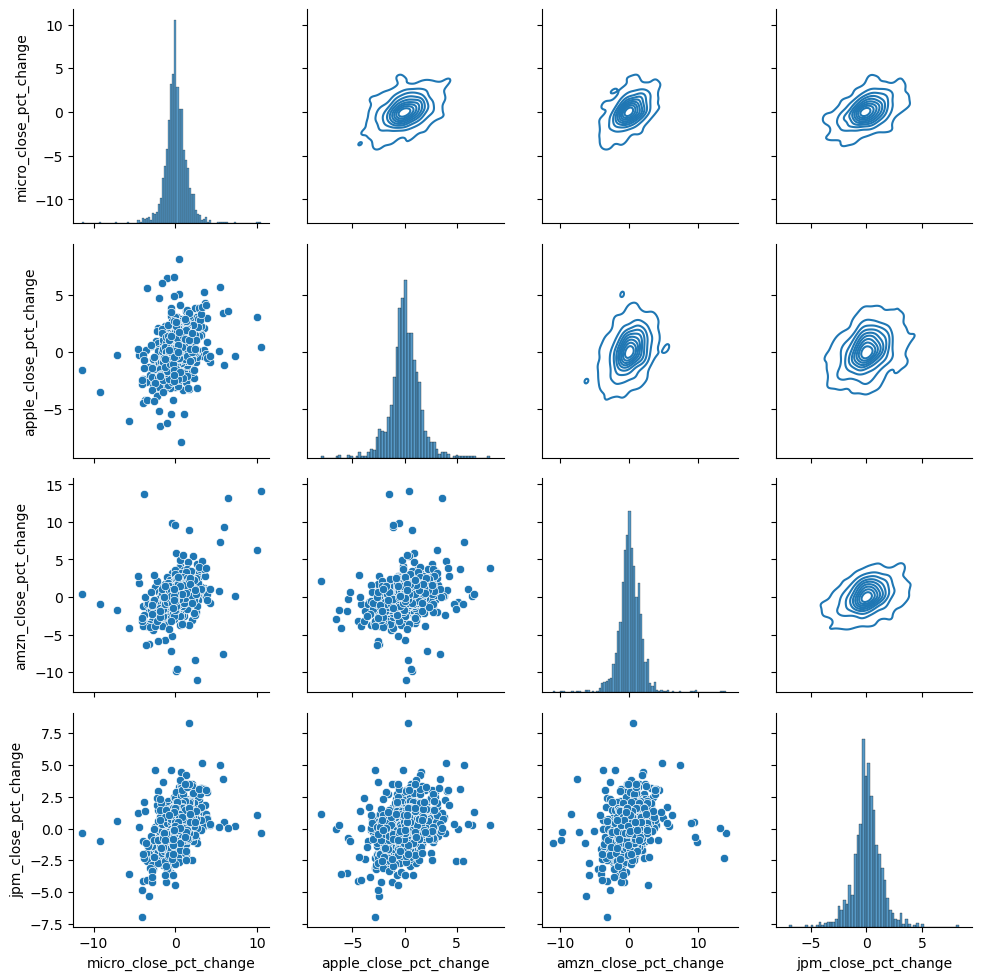

In [118]:
closing_df_plot=sns.PairGrid(data=closing_df)
closing_df_plot.map_diag(sns.histplot)
closing_df_plot.map_lower(sns.scatterplot)
closing_df_plot.map_upper(sns.kdeplot)

In [119]:
closing_df.corr()

micro_close_pct_change  apple_close_pct_change  \
micro_close_pct_change                1.000000                0.366598   
apple_close_pct_change                0.366598                1.000000   
amzn_close_pct_change                 0.402678                0.287659   
jpm_close_pct_change                  0.413488                0.327790   

                        amzn_close_pct_change  jpm_close_pct_change  
micro_close_pct_change               0.402678              0.413488  
apple_close_pct_change               0.287659              0.327790  
amzn_close_pct_change                1.000000              0.291156  
jpm_close_pct_change                 0.291156              1.000000

<Axes: >

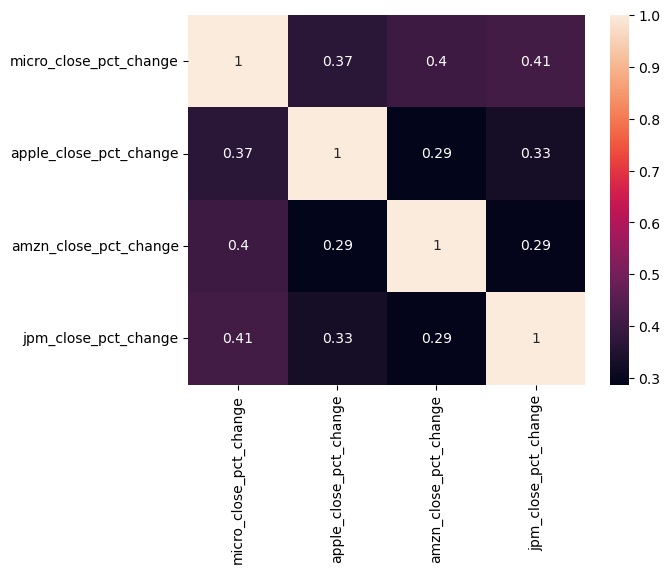

In [121]:
sns.heatmap(closing_df.corr(),annot=True)